In [1]:
import numpy as np
from matplotlib import pyplot as plt
import emcee
import corner
import chisq_exemple as chisq
import lmfit as fit


In [15]:
N = 1000

x = np.array(np.linspace(-30.,30.,N))
param = np.array([2.,5.])
y = x * param[0] + param [1]
sig = 0.5
y_err = np.ones_like(y)*sig

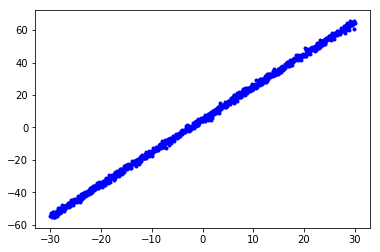

In [26]:
np.random.seed(171)

y += np.random.normal(scale=sig, size=len(y))
 
plt.errorbar(x,y,yerr=y_err,color='b',fmt='.')
plt.show()

In [27]:
chi2 = chisq.chisq(x,y,y_err)
chi2.chisq([2,5])

toto


4702.680874124575

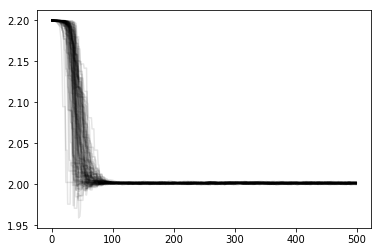

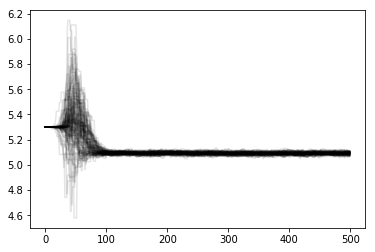

In [28]:
np.random.seed(45)
ndim, nwalkers = 2, 100
p0 = [2.2 ,5.3]
pos = [p0 + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, chi2.chisq_mcmc)
sampler.run_mcmc(pos, 500)

for j in range(ndim):
    plt.figure()
    for i in range(nwalkers):
        plt.plot(sampler.chain[i,:,j],'k', alpha=0.1)
plt.show()

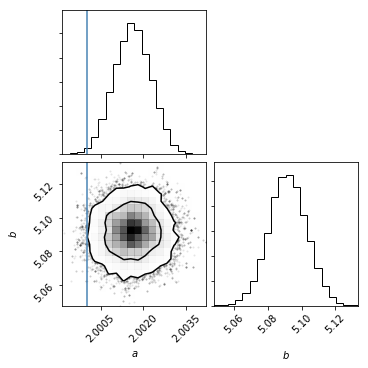

In [29]:
samples = sampler.chain[:, 150:, :].reshape((-1, ndim))
results = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                        zip(*np.percentile(samples, [16, 50, 84],
                                             axis=0)))
import corner
fig = corner.corner(samples, labels=["$a$", "$b$"],
                    truths=[2, 5], 
                    levels=(0.68, 0.95))
plt.show()